In [48]:
import pandas as pd
import os
import wordcloud
from subprocess import check_output
import matplotlib.pyplot as plt
%pylab inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
import random
from PIL import Image
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
tokenizer = spacy.load('en_core_web_sm')

Populating the interactive namespace from numpy and matplotlib


/Users/Stella/miniconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'svd']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
folder_path = '/'.join(os.getcwd().split('/')[:-1]) + '/Clean Data/'

In [3]:
a_tracks = pd.read_csv(folder_path + 'a_tracks.csv')

In [9]:
all_lyrics = pd.read_csv('all_lyrics_ABC.csv')

In [50]:
vectorizer = TfidfVectorizer()
svd = TruncatedSVD(n_components=50)

In [51]:
artists = ['Ed Sheeran','Eminem','Ariana Grande','Nicki Minaj','']

In [52]:
df = all_lyrics[all_lyrics['ARTIST'].isin(artists)]
X = vectorizer.fit_transform(df['lyrics'])
SVD_output = svd.fit_transform(X)

In [53]:
TSNE = TSNE(n_components=2).fit_transform(SVD_output)

In [64]:
df_vis = pd.DataFrame({'x':[m[0] for m in TSNE],'y':[m[1] for m in TSNE],'Artist':df['ARTIST'],'Pop_Score':df['POP']})

In [16]:
def pop_level(score):
    if 0 <= score <= 20:
        return 1
    if 20 < score <= 40:
        return 2
    if 40 < score <= 60:
        return 3
    if 60 < score <= 80:
        return 4
    if 80 < score <= 100:
        return 5

In [65]:
df_vis['Pop_Level'] = df_vis['Pop_Score'].apply(lambda x: pop_level(x))

In [19]:
import matplotlib.cm as cm

In [62]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

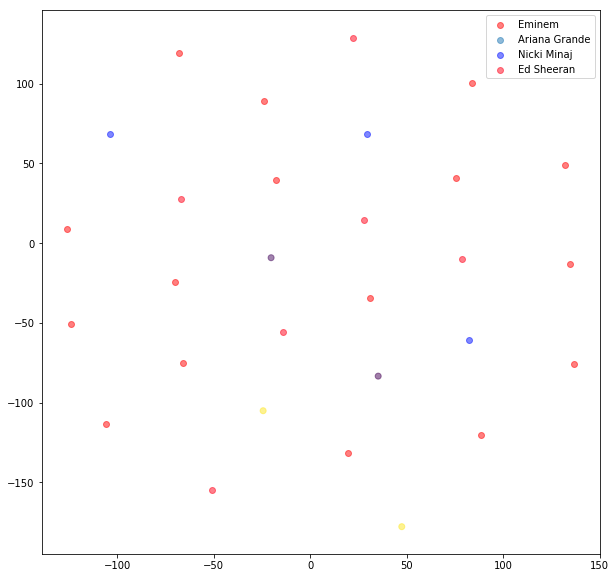

In [66]:
cmap = get_cmap(len(df_vis['Artist'].unique()))

fig, ax = plt.subplots(figsize = (10,10))
for i, a in enumerate(df_vis['Artist'].unique()):
    ax.scatter(x = 'x', y = 'y', data = df_vis[df_vis['Artist'] == a], c=cmap(i), alpha=0.5,label=a)
    color_index += 1
ax.legend()

In [68]:
punctuations = string.punctuation
def tokenize(lyrics):
    temp = ''.join(lyrics).lower().split(' ')
    tokens = [token for token in temp 
            if (token not in punctuations) & (token not in STOP_WORDS)]
    
    return ' '.join(tokens).replace('\n','')


In [95]:
all_songs = pd.read_csv('final_matrix.csv')

In [ ]:
all_songs_BC = all_songs.copy()
a_tracks['Level'] = 'A'

all_songs_BC['Level'] = all_songs_BC['B_Level Artist?'].apply(lambda x: 'B' if x == 1 else 'C')
all_songs_BC = all_songs_BC.rename(columns={'max_popularity':'POP'})

all_lyrics = a_tracks[['lyrics','Level','POP','ARTIST']].append(all_songs_BC[['lyrics','Level','POP','ARTIST']])

In [ ]:
all_lyrics.to_csv('all_lyrics_ABC.csv',index=False)

In [70]:
mask = np.array(Image.open("flag.png"))
image_colors = wordcloud.ImageColorGenerator(mask)

/Users/Stella/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


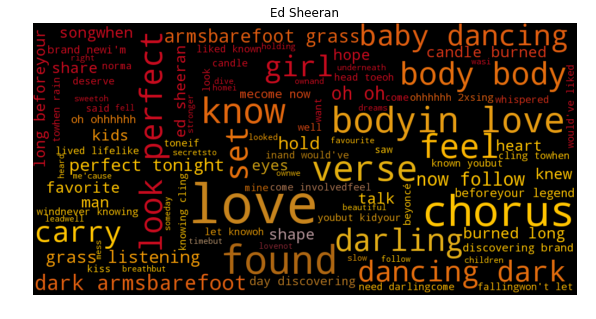

In [72]:

df = a_lyrics[all_lyrics['ARTIST'] == 'Ed Sheeran']
songs = tokenize(df.lyrics)
cloud = wordcloud.WordCloud(
                        max_font_size=100,
                        width=1000,
                        height=500,
                        max_words=100,
                        relative_scaling=.5).generate(songs)

plt.figure(figsize=(10,5))
plt.axis('off')
plt.savefig('{}.png'.format(a))
plt.title('{}'.format(a))
plt.imshow(cloud.recolor(color_func=image_colors), interpolation="bilinear");


/Users/Stella/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


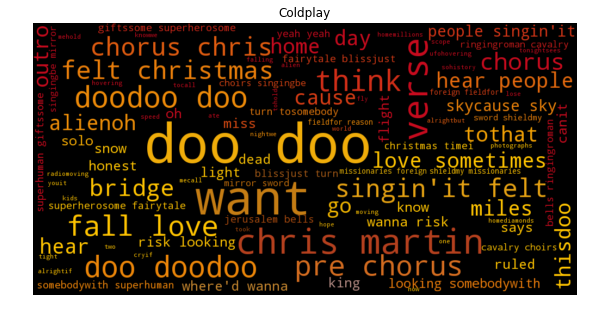

In [74]:
df = a_lyrics[all_lyrics['ARTIST'] == 'Coldplay']
songs = tokenize(df.lyrics)
cloud = wordcloud.WordCloud(
                        max_font_size=100,
                        width=1000,
                        height=500,
                        max_words=100,
                        relative_scaling=.5).generate(songs)

plt.figure(figsize=(10,5))
plt.axis('off')
plt.title('Coldplay')
plt.imshow(cloud.recolor(color_func=image_colors), interpolation="bilinear");
